<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Loading the Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [2]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
#Convert Labels into numbers
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

In [6]:
#Creating dummies to convert the categorical columns to numerical columns
df_dummies = pd.get_dummies(df)
print(df_dummies)

       age  duration  ...  poutcome_nonexistent  poutcome_success
0       56       261  ...                     1                 0
1       57       149  ...                     1                 0
2       37       226  ...                     1                 0
3       40       151  ...                     1                 0
4       56       307  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73       334  ...                     1                 0
41184   46       383  ...                     1                 0
41185   56       189  ...                     1                 0
41186   44       442  ...                     1                 0
41187   74       239  ...                     0                 0

[41188 rows x 64 columns]


In [7]:
#Dropping the duration column
df_dummies.drop(['duration'],axis = 1, inplace = True)

In [8]:
df_dummies.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

In [9]:
#Checking for Null values
df_dummies.isnull().sum()
#No Null values

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

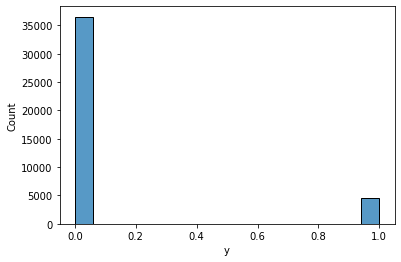

In [10]:
#Histogram plot of the label
sns_plot = sns.histplot(df_dummies['y'])

In [11]:
#we have an imbalance dataset
values=df_dummies['y'].value_counts()
values

0    36548
1     4640
Name: y, dtype: int64

In [12]:
values[0]
values[1]
imblc = values[1]/values[0]
imblc
print((4640/(36548+4640))*100)

11.265417111780131


In [13]:
# Split Target/Output from Features
y = df_dummies.y # Target variable
X = df_dummies.drop('y',axis=1) # Features

In [14]:
#Splitting the data using train_test_split
from sklearn.model_selection import train_test_split, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=50)

In [15]:
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
scores = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy', verbose=10)
print(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.4s


[0.89590288 0.90227618 0.89924127 0.89286798 0.89711684 0.90197269
 0.89620637 0.89863429 0.89742033 0.89802731]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished


In [17]:
'''# Fitting Random Forest Classifier
from sklearn.metrics import f1_score

#10-Fold classifier
kfold = KFold(n_splits=10, random_state=50, shuffle= True)
# Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=3)

# Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

results_kfold = cross_val_score(RF_Classifier, X_train, y_train, cv=kfold, scoring=make_scorer(f1_score))
print("F1 score:", f1_score(y_test, y_pred))
print(results_kfold)
'''

'# Fitting Random Forest Classifier\nfrom sklearn.metrics import f1_score\n\n#10-Fold classifier\nkfold = KFold(n_splits=10, random_state=50, shuffle= True)\n# Create a Random Forest Classifier\nRF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=3)\n\n# Train the model using the training sets\nRF_Classifier.fit(X_train, y_train)\n\n# Predict the response for test dataset\ny_pred = RF_Classifier.predict(X_test)\n\nresults_kfold = cross_val_score(RF_Classifier, X_train, y_train, cv=kfold, scoring=make_scorer(f1_score))\nprint("F1 score:", f1_score(y_test, y_pred))\nprint(results_kfold)\n'

In [18]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [19]:
DummyClf = DummyClassifier(strategy='stratified')
DummyClf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [20]:
Dummy_score = cross_val_score(DummyClf, X_train, y=y_train, scoring='f1', cv=10)
Dummy_score.mean()

0.1180443968365779

In [29]:
f1_score(y_test, DummyClf.predict(X_test))
#acc(y_test, DummyClf.predict(X_test))

0.10290093048713737

In [30]:
f1_score(y_test, clf.predict(X_test))
#acc(y_test, clf.predict(X_test))

0.19794584500466855

In [31]:
from sklearn.model_selection import GridSearchCV
# Using the GridSearchCV, hyperparameters are tuned
# Arranging Parameter Range 
'''param_grid = { 
    'n_estimators': [50,100,200,300,400], 
    'max_features': ['auto'],
    'max_depth' : [3,5,10,15,20],
    'criterion' :['gini', 'entropy']
}'''
param_grid = { 
    'n_estimators': [50,100], 
    'max_features': ['auto'],
    'max_depth' : [3,5,10],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10)
# Model Fitting
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [32]:
# Best parameter after tuning 
print(grid.best_params_)
grid.best_score_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


0.9006373292867982

In [35]:
print('Train Accuracy:', grid.score(X_train,y_train))
print('Test Accuracy :', grid.score(X_test,y_test))

Train Accuracy: 0.9132625189681335
Test Accuracy : 0.900825443068706


In [36]:
score_cv = cross_val_score(estimator=grid.best_estimator_, X=X_train, 
                            y=y_train, cv=cv, n_jobs=-1, scoring='accuracy', verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.3s finished


In [ ]:
score_cv

In [ ]:
# Fitting Random Forest Classifier to the dataset after hyperparameter tuning
# Create a Random Forest Classifier

RFC = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto',criterion='entropy')

# Train the model using the training sets
RFC.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = RFC.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred,average='weighted'))

In [ ]:

# Checking the cross validation scores and prediction
score=cross_val_score(RFC, X_train, y_train)
print('cross_val_score=',score)
predictions = cross_val_predict(RFC, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions,average='weighted')
print('Cross-Predicted f1_score:', f1_score_clf)

In [ ]:
#Checking the cross validation average scores
score=cross_val_score(RFC, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

In [45]:
#Assigning the column names to features
features=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

In [ ]:
# Feature Importance
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Feature rankings
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the Feature Importance
fig = plt.figure()
plt.title("Feature's Importance")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importance.pdf", bbox_inches='tight')

# Top 3:
#1. nr.employed (0.156643)
#2. euribor3m (0.156275)
#3. emp.var.rate (0.081952)

## Quiz Calculations

In [39]:
# Create a Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=400,max_depth=6)

#Train the model using the training sets
RFC.fit(X_train, y_train)

#print("F1 score:", f1_score(y_test, y_pred))

score = cross_val_score(RFC, X_train, y=y_train, scoring='f1', cv=10)
score

array([0.25541126, 0.30172414, 0.22717149, 0.2875817 , 0.23296703,
       0.31034483, 0.38603696, 0.25494505, 0.27133479, 0.28144989])

In [40]:
score.mean()

0.28089671468902455

In [41]:
# Create a Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=200,max_depth=8)

#Train the model using the training sets
RFC.fit(X_train, y_train)

#print("F1 score:", f1_score(y_test, y_pred))

score = cross_val_score(RFC, X_train, y=y_train, scoring='f1', cv=10)
print(score)
score.mean()

[0.27292111 0.33333333 0.26293103 0.29184549 0.25267666 0.32340426
 0.40881764 0.27350427 0.29487179 0.29052632]


0.30048319044044675

In [42]:
#For n_estimators=100,max_depth=8,random_state=60 generalisation error

RFC = RandomForestClassifier(n_estimators=1000,max_depth=8,random_state=60)

#Train the model using the training sets
RFC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RFC.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.33278955954323


In [43]:


#For n_estimators=400,max_depth=8,random_state=60 top 3 features
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=400,max_depth=8,random_state=60)

#Train the model using the training sets
RFC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RFC.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.33495934959349594


[ 8  7  2 61  4  6  5  0  3 60 59 49 52 50 42 43  1 44 55 48 53 10 14 33
 31 34 17 56 54 23 57 58 22 36 28 38 27 30 39  9 18 45 51 47 41 25 32 21
 16 46 13 26 15 19 20 40 12 37 11 24 29 35]
Feature ranking:
1. nr.employed (0.154584)
2. euribor3m (0.145614)
3. pdays (0.109492)
4. poutcome_nonexistent (0.085388)
5. emp.var.rate (0.080865)
6. cons.conf.idx (0.073293)
7. cons.price.idx (0.060223)
8. age (0.032174)
9. previous (0.025657)
10. poutcome_failure (0.020202)
11. day_of_week_wed (0.017413)
12. month_jun (0.016839)
13. month_nov (0.016137)
14. month_mar (0.013737)
15. loan_yes (0.012448)
16. contact_cellular (0.012064)
17. campaign (0.010049)
18. contact_telephone (0.007834)
19. day_of_week_fri (0.006153)
20. month_jul (0.005791)
21. month_oct (0.005777)
22. job_admin. (0.004065)
23. job_management (0.004055)
24. education_unknown (0.003976)
25. education_professional.course (0.003890)
26. default_no (0.003778)
27. job_services (0.003375)
28. day_of_week_mon (0.003167)
29. month_se

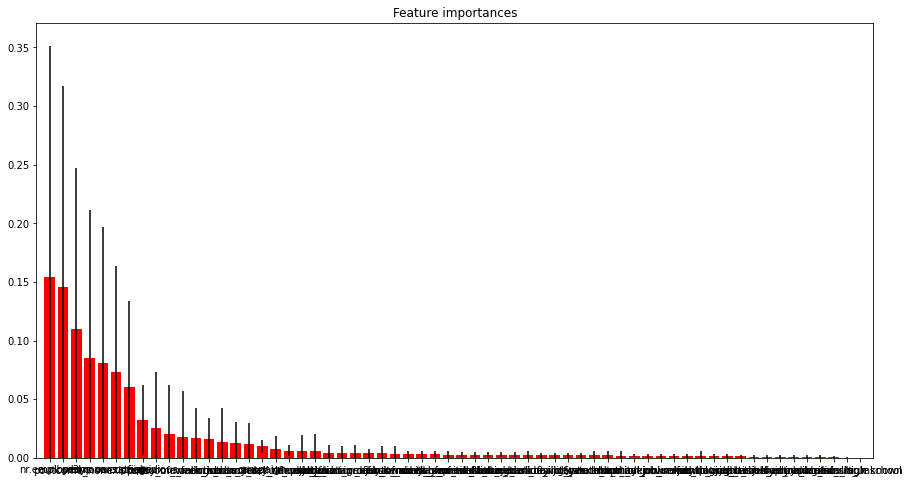

In [46]:
#Feature importance for n_estimators=100,max_depth=12,random_state=60
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)